Implement a basic hashing model from scratch that hashes the images. You can use any dataset 
of few images and can implement a-hash or any other hashing algorithm of your choice. For a￾hash, given any images, first resize the image to a suitable size, followed by grayscale conversion 
of the image. Then mean normalise the image to obtain a binary image, whose sum can be used 
as a hash value. 
Using the hash model, encode all the images present inside your directory and 
then search for images similar to the query image.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

In [57]:
def normalize(img_arr):
    return abs(img_arr - np.mean(img_arr))/np.std(img_arr)

In [58]:
img_arr_list = []
bw_img_arr_list = []

for i in os.listdir("Fifty States License Plates"):
    img = cv2.imread(f"Fifty States License Plates/{i}", 0)
#     dim = ((int(img.shape[0]/2),int(img.shape[1]/2)))
    dim = (160,120)
    img = cv2.resize(img, dim)
    img_arr_list.append(img)
    img = normalize(img)
    bw_img_arr_list.append(img.astype(int))
img_arr = np.array(img_arr_list)
bw_img_arr = np.array(bw_img_arr_list)
img_arr.shape, bw_img_arr.shape

((53, 120, 160), (53, 120, 160))

In [59]:
b = img_arr.reshape(53,-1)
b.shape, b[0]

((53, 19200), array([187, 187, 187, ...,  10,  10,  10], dtype=uint8))

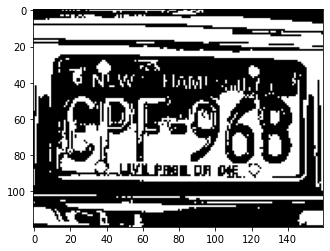

In [66]:
a = bw_img_arr[30]
plt.imshow(a, cmap = 'gray')

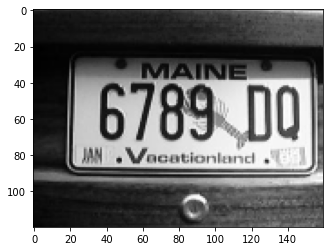

In [67]:
a = img_arr[20]
plt.imshow(a, cmap = 'gray')

In [77]:
df = pd.DataFrame(os.listdir("Fifty States License Plates"), columns = ['States'])
df['Hash Value'] = [hash(np.sum(x)) for x in bw_img_arr]
df

,States,Hash Value
0,Alabama.jpg,7875
1,Alaska.jpg,9675
2,Arizona.jpg,4638
3,Arkansas.jpg,7433
4,California.jpg,9926
5,Colorado.jpg,7087
6,Connecticut.jpg,4772
7,Delaware.jpg,5174
8,DistrictOfColumbia.jpg,5042
9,Florida.jpg,8580


Use Image.open for raking images as input and convert into RGB.

In [73]:
rand_number = np.random.randint(0,52)

In [74]:
test_img = img_arr[rand_number]

In [75]:
normalized_test_img = normalize(test_img).astype(int)

In [78]:
test_img_hash_code = np.sum(normalized_test_img)
test_img_hash_code

4772

### Finding the State using the hashvalue

In [88]:
print("The hash value corresponds to : " + df[df['Hash Value'] == test_img_hash_code]['States'].values[0][:-4])

The hash value corresponds to : Connecticut
